In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import numpy as np
import re
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("forms_0620.csv")
columns = ["timestamp", 
           "grade", 
           "faculty", 
           "sex", 
           "living", 
           "f2_no3", 
           "no2_f3", 
           "f2_f3", 
           "frequency_c", 
           "average_payment", 
           "when_to_use", 
           "n_of_people", 
           "reasons_for_using_c", 
           "reasons_for_not_using_c", 
           "frequently_chose_menu", 
           "good_points_of_c", 
           "bad_points_of_c", 
           "impression_of_c", 
           "frequency_b", 
           "preference_b_vs_c", 
           "where_to_eat_b", 
           "preference_e_vs_w", 
           "reasons_e_vs_w", 
           "using_app", 
           "reasons_for_using_app", 
           "how_to_deposit", 
           "reasons_for_not_using_app", 
           "desirable_features"]
df1 = df.set_axis(columns, axis="columns", copy=True)
df2 = df1.drop(columns="timestamp")
df3 = df2.replace({"": float("nan")})

In [3]:
df3

,grade,faculty,sex,living,f2_no3,no2_f3,f2_f3,frequency_c,average_payment,when_to_use,...,frequency_b,preference_b_vs_c,where_to_eat_b,preference_e_vs_w,reasons_e_vs_w,using_app,reasons_for_using_app,how_to_deposit,reasons_for_not_using_app,desirable_features
0,学部3年,商学部,男性,一人暮らし（自炊をする）,なし,なし,なし,0回,500円〜800円,利用しない,...,週０回,パンショップ,次の授業の教室,西学食,立地,いいえ,NaN,NaN,"入金が面倒だから, 使用が面倒だから, 利用価値を感じないから",事前注文
1,学部4年,商学部,男性,一人暮らし（自炊をしない）,なし,週１回,なし,0回,利用しない,利用しない,...,週０回,どちらも好きではない,学食内の席,どちらも好きではない,NaN,はい,支払いが便利,クレカ入金（自分のお金）,利用している,事前注文
2,学部3年,商学部,男性,実家暮らし,なし,週２回,なし,0回,500円〜800円,"11:30~11:45, 11:45~12:00, 12:00~12:15, 12:15~1...",...,週０回,学食,学食内の席,東学食,メニュー数が多い,いいえ,NaN,NaN,利用価値を感じないから,クーポンの配布
3,学部3年,商学部,男性,一人暮らし（自炊をする）,なし,週１回,なし,２〜３回,300円〜500円,"12:45~13:00, 夜営業",...,週１回,学食,その他教室,東学食,"席数が多い, メニュー数が多い, 混んでいない気がする, 雰囲気",いいえ,NaN,NaN,使用方法を知らないから,クーポンの配布
4,学部2年,社会学部,女性,実家暮らし,なし,週２回,週１回,１回,300円〜500円,"パンショップのみ利用, 12:00~12:15, 12:15~12:30",...,週２〜３回,パンショップ,次の授業の教室,東学食,"席数が多い, メニュー数が多い",いいえ,NaN,NaN,入金が面倒だから,クーポンの配布
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,学部3年,商学部,男性,一人暮らし（自炊をしない）,週３回,週１回,なし,２〜３回,500円〜800円,"12:30~12:45, 12:45~13:00, 13:00~13:15, 13:15~1...",...,週２〜３回,どちらも好きではない,その他教室,西学食,立地,いいえ,NaN,NaN,"入金が面倒だから, 使用が面倒だから, 利用価値を感じないから",NaN
92,学部3年,商学部,男性,実家暮らし,なし,週１回,なし,２〜３回,300円〜500円,"12:00~12:15, 12:15~12:30, 12:30~12:45",...,週０回,学食,外のベンチ,東学食,"席数が多い, 混んでいない気がする, 雰囲気",いいえ,NaN,NaN,入金が面倒だから,クーポンの配布
93,学部4年,商学部,女性,実家暮らし,なし,週２回,週１回,0回,利用しない,利用しない,...,週２〜３回,パンショップ,次の授業の教室,どちらも好きではない,NaN,いいえ,NaN,NaN,使用方法を知らないから,混雑状況の確認
94,学部3年,商学部,女性,実家暮らし,週１回,週１回,週１回,１回,300円〜500円,"12:30~12:45, 12:45~13:00",...,週１回,どちらも好きではない,次の授業の教室,東学食,"席数が多い, 混んでいない気がする, 雰囲気",いいえ,NaN,NaN,入金が面倒だから,"事前注文, クーポンの配布, 席から頼めたら便利。入金もっと簡単にして欲しいです🥺。(クレカ..."


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   grade                      96 non-null     object
 1   faculty                    96 non-null     object
 2   sex                        96 non-null     object
 3   living                     96 non-null     object
 4   f2_no3                     96 non-null     object
 5   no2_f3                     96 non-null     object
 6   f2_f3                      96 non-null     object
 7   frequency_c                96 non-null     object
 8   average_payment            96 non-null     object
 9   when_to_use                96 non-null     object
 10  n_of_people                96 non-null     object
 11  reasons_for_using_c        96 non-null     object
 12  reasons_for_not_using_c    96 non-null     object
 13  frequently_chose_menu      96 non-null     object
 14  good_points_

In [5]:
r, c = df2.shape
column_names = list(df2.columns)
for i in range(c):
    print(column_names[i], ": ", set(df2[column_names[i]]))

grade :  {'院生', '学部4年', '学部3年', '学部2年', '学部1年'}
faculty :  {'経済学部', 'ソーシャル・データ・サイエンス学部', '大学院', '商学部', '法学部', '社会学部'}
sex :  {'女性', '男性'}
living :  {'寮暮らし（食事が出ない）', '一人暮らし（自炊をしない）', '一人暮らし（自炊をする）', '寮暮らし（食事が出る）', '実家暮らし'}
f2_no3 :  {'週２回', '週３回', '週５回', 'なし', '週１回'}
no2_f3 :  {'週２回', 'なし', '週１回', '週３回'}
f2_f3 :  {'週２回', '週３回', '週５回', '週４回', 'なし', '週１回'}
frequency_c :  {'0回', '２〜３回', '４回以上', '１回'}
average_payment :  {'利用しない', '500円〜800円', '300円〜500円', '〜300円', '800円〜1000円', '1000円〜'}
when_to_use :  {'12:00~12:15, 12:15~12:30', '12:15~12:30, 12:30~12:45, 12:45~13:00', '12:45~13:00, 13:00~13:15, 13:15~13:30, 13:30~13:45, 13:45~14:00, 14:00~14:15', 'パンショップのみ利用, 12:30~12:45, 12:45~13:00, 13:00~13:15', '12:45~13:00', '12:15~12:30, 12:30~12:45', '12:45~13:00, 夜営業', '12:30~12:45', '12:15~12:30, 12:30~12:45, 12:45~13:00, 13:00~13:15, 13:15~13:30', '利用しない', '11:30~11:45, 11:45~12:00, 12:00~12:15, 12:15~12:30, 12:30~12:45', '12:00~12:15, 12:15~12:30, 12:30~12:45, 12:45~13:00', '11:30~11:45, 11:45

In [6]:
df4 = df3.replace({"grade": {'学部4年': "B4", '学部3年': "B3", '学部2年': "B2", '院生': "Master", '学部1年': "B1"}, 
                   "faculty": {'社会学部': "Soc", 'ソーシャル・データ・サイエンス学部': "SDS", '大学院': "Grad", '法学部': "Law", '商学部': "Com", '経済学部': "Econ"}, 
                   "sex": {'男性': "m", '女性': "f"}, 
                   "living": {'一人暮らし（自炊をしない）': "1人暮らし（自炊あり）", 
                              '一人暮らし（自炊をする）': "1人暮らし（自炊なし）", 
                              '寮暮らし（食事が出ない）': "寮（食事なし）", 
                              '寮暮らし（食事が出る）': "寮（食事付き）"}, 
                   "f2_no3": {'週２回': 2, '週３回': 3, '週１回': 1, 'なし': 0, '週５回': 5}, 
                   "no2_f3": {'週２回': 2, '週３回': 3, 'なし': 0, '週１回': 1}, 
                   "f2_f3": {'週２回': 2, '週３回': 3, '週１回': 1, 'なし': 0, '週４回': 4, '週５回': 5}, 
                   "frequency_c": {'２〜３回': 2, '0回': 0, '４回以上': 3, '１回': 1}, 
                   "average_payment": {'1000円〜': 5, '〜300円': 1, '500円〜800円': 3, '800円〜1000円': 4, '利用しない': 0, '300円〜500円': 2}, 
                   "n_of_people": {'1人': 1, '利用しない': 0, '2～3人': 2, '4人以上': 3}, 
                   "frequency_b": {'月2〜3回': 1, '週２〜３回': 3, '週０回': 0, '週４回以上': 4, '週１回': 2, '月1回程度。部活後にアイス食べたりはしちゃいます。': 1}, 
                   "preference_b_vs_c": {'どちらも好きではない': "両方嫌い", '好き嫌い無くどちらも利用する': "両方好き"}, 
                   "preference_e_vs_w": {'どちらも好きではない': "両方嫌い", 'どちらも好き。': "両方好き"}, 
                   "how_to_deposit": {'アプリ導入時に学食カード？の残金を移行したのが残っているため使っている。使い切ったら使用しないと思う。': "入金しない", 
                                      '入学した時にチャージしただけ': "入金しない", 
                                      'クレカ入金（自分のお金）': "クレカ（自）", 
                                      'コンビニ入金（自分のお金）': "コンビニ（自）", 
                                      '生協レジでチャージ（自分のお金）': "生協レジ（自）", 
                                      'クレカ入金（親のお金）': "クレカ（親）", 
                                      'コンビニ入金（親のお金）': "コンビニ（親）", 
                                      '生協レジでチャージ（親のお金）': "生協レジ（親）"}, 
                   "where_to_eat_b": {'外のベンチ': "外", '買わない': "利用しない", '食べ歩き': "外"}})

C:\Users\thiyo\AppData\Local\Temp\ipykernel_27048\80086376.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4 = df3.replace({"grade": {'学部4年': "B4", '学部3年': "B3", '学部2年': "B2", '院生': "Master", '学部1年': "B1"},


In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   grade                      96 non-null     object
 1   faculty                    96 non-null     object
 2   sex                        96 non-null     object
 3   living                     96 non-null     object
 4   f2_no3                     96 non-null     int64 
 5   no2_f3                     96 non-null     int64 
 6   f2_f3                      96 non-null     int64 
 7   frequency_c                96 non-null     int64 
 8   average_payment            96 non-null     int64 
 9   when_to_use                96 non-null     object
 10  n_of_people                96 non-null     int64 
 11  reasons_for_using_c        96 non-null     object
 12  reasons_for_not_using_c    96 non-null     object
 13  frequently_chose_menu      96 non-null     object
 14  good_points_

In [8]:
df5 = df4.replace({float("nan"): "nan"})

In [9]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   grade                      96 non-null     object
 1   faculty                    96 non-null     object
 2   sex                        96 non-null     object
 3   living                     96 non-null     object
 4   f2_no3                     96 non-null     int64 
 5   no2_f3                     96 non-null     int64 
 6   f2_f3                      96 non-null     int64 
 7   frequency_c                96 non-null     int64 
 8   average_payment            96 non-null     int64 
 9   when_to_use                96 non-null     object
 10  n_of_people                96 non-null     int64 
 11  reasons_for_using_c        96 non-null     object
 12  reasons_for_not_using_c    96 non-null     object
 13  frequently_chose_menu      96 non-null     object
 14  good_points_

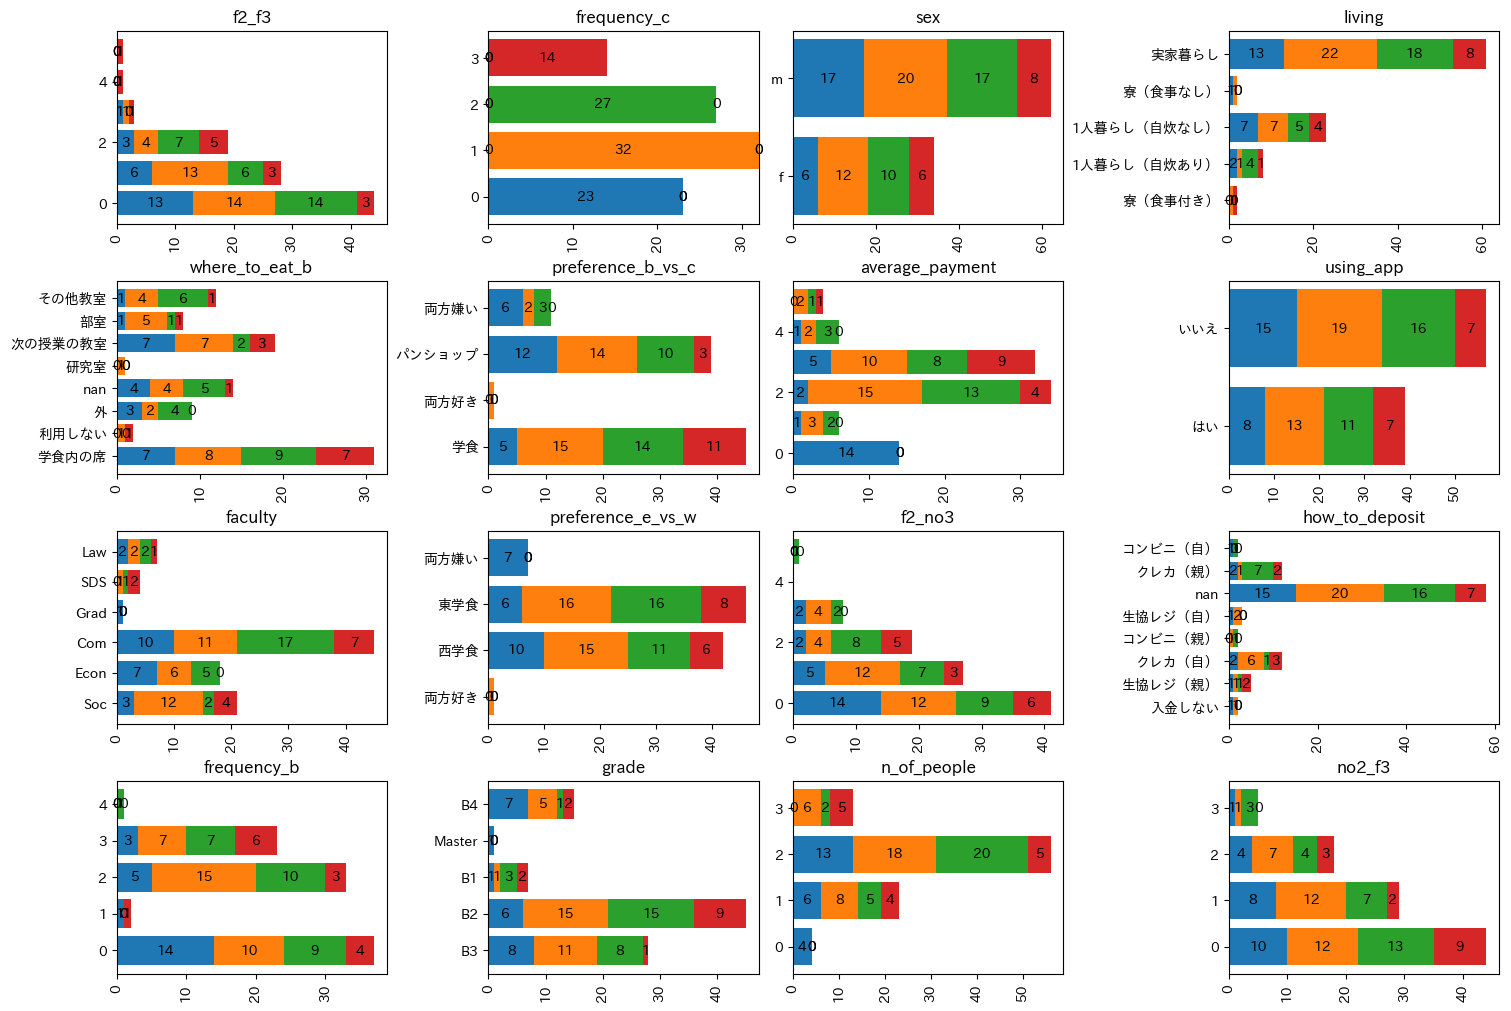

In [10]:
#exclusion_set = set(["when_to_use", 
#                     'reasons_for_using_c', 
#                     'reasons_for_not_using_c', 
#                     'frequently_chose_menu', 
#                     'good_points_of_c', 
#                     'bad_points_of_c', 
#                     'impression_of_c', 
#                     'reasons_e_vs_w', 
#                     'reasons_for_using_app', 
#                     'reasons_for_not_using_app', 
#                     'desirable_features'])
#column_set = set(column_names)
#new_column_set = column_set - exclusion_set
#new_column_list = list(new_column_set)
#fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout="constrained")
#cnt = 0
#for i in range(4):
#    for j in range(4):
#       axs[i, j].set_title(new_column_list[cnt])
#       axs[i, j].tick_params(axis="x", rotation=90)
#       y_labels = list(set(df5[new_column_list[cnt]]))
#       heights = [len(df5[df5[new_column_list[cnt]] == y_labels[k]]) for k in range(len(y_labels))]
#       p = axs[i, j].barh(y_labels, heights)
#       axs[i, j].bar_label(p, label_type="center", color="white")
#       cnt += 1 

exclusion_set = set(["when_to_use", 
                     'reasons_for_using_c', 
                     'reasons_for_not_using_c', 
                     'frequently_chose_menu', 
                     'good_points_of_c', 
                     'bad_points_of_c', 
                     'impression_of_c', 
                     'reasons_e_vs_w', 
                     'reasons_for_using_app', 
                     'reasons_for_not_using_app', 
                     'desirable_features'])
column_set = set(column_names)
new_column_set = column_set - exclusion_set
new_column_list = list(new_column_set)
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout="constrained")
cnt = 0
for i in range(4):
    for j in range(4):
        axs[i, j].set_title(new_column_list[cnt])
        axs[i, j].tick_params(axis="x", rotation=90)
        y_labels = list(set(df5[new_column_list[cnt]]))
        labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
        heights = [[len(df5[(df5[new_column_list[cnt]] == y_labels[k]) & (df5["frequency_c"] == l)]) for k in range(len(y_labels))] for l in range(4)]
        left = np.zeros(len(y_labels))
        for k in range(4):
            p = axs[i, j].barh(y_labels, heights[k], label=labels[k], left=left)
            left += heights[k]
            axs[i, j].bar_label(p, label_type="center")
        cnt += 1


In [11]:
df_dummy = pd.read_csv("final.csv")

In [12]:
df_dummy

,Q1_B1,Q1_B2,Q1_B3,Q1_B4,Q1_Master,Q2_Com,Q2_Econ,Q2_Law,Q2_Soc,Q2_SDS,...,Q26_利用価値がないから,Q26_そもそも知らなかった,Q26_使い方がわからないから,Q26_学食を利用しないから,Q27_アプリの軽さ,Q27_クレカとの紐づけ,Q27_クーポンの配布,Q27_ドーナツ情報,Q27_モバイルオーダー,Q27_混雑状況の確認
0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
92,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
94,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [13]:
questions = [[1, "学年"], 
             [2, "学部"], 
             [3, "性別"], 
             [4, "居住形態"], 
             [5, "2限対面3限なし"], 
             [6, "2限なし3限対面"], 
             [7, "2限対面3限対面"], 
             [8, "学食利用頻度"], 
             [9, "学食平均利用額"], 
             [10, "学食利用時間帯"], 
             [11, "学食利用人数"], 
             [12, "学食を利用する理由"], 
             [13, "学食を利用しない理由"], 
             [14, "よく選ぶメニュー"], 
             [15, "学食の好きな点"], 
             [16, "学食の嫌いな点"], 
             [17, "学食の印象"], 
             [18, "西学食と東学食のどちらが好きか"], 
             [19, "西or東学食が好きな理由"], 
             [20, "パンショップ利用頻度"], 
             [21, "学食とパンショップのどちらが好きか"], 
             [22, "パンショップで買ったものをどこで食べるか"], 
             [23, "生協アプリを使っているか"], 
             [24, "生協アプリを使う理由"], 
             [25, "生協アプリへの入金方法"], 
             [26, "生協アプリを使わない理由"], 
             [27, "生協アプリに求める機能"]]

In [14]:
def extract_columns(df: DataFrame, question_number: int):
    columns = list(df.columns)
    p = re.compile(f'^Q{question_number}_')
    idxs = []
    for column in columns:
        result = p.match(column)
        if result is not None:
            idxs.append(columns.index(column))
    new_df = df.iloc[:, idxs[0]:idxs[-1]+1]
    return new_df

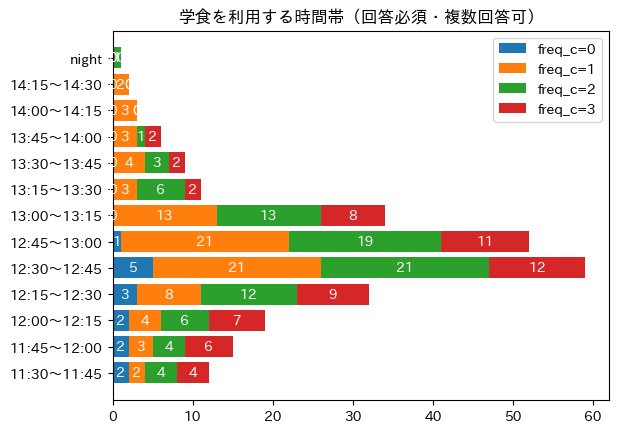

In [15]:
#df_when_to_use = extract_columns(df_dummy, 10)
#y_labels = list(df_when_to_use.columns)
#y_labels = [label[4:].replace("~", "～") for label in y_labels]
#heights = list(df_when_to_use.sum())
#fig, ax = plt.subplots()
#p = ax.barh(y_labels, heights)
#ax.set_title("学食を利用する時間帯（複数回答）")
#ax.bar_label(p, label_type="center", color="white")

df_when_to_use = extract_columns(df_dummy, 10)
y_labels = list(df_when_to_use.columns)
new_y_labels = [label[4:].replace("~", "～") for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("学食を利用する時間帯（回答必須・複数回答可）")
ax.legend()

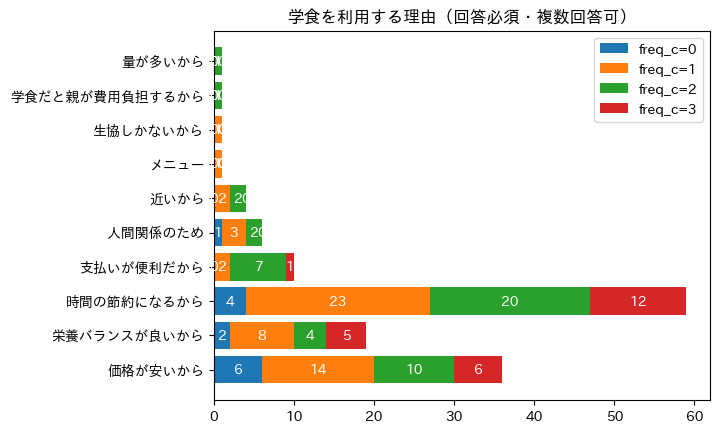

In [16]:
#df_reasons_for_using_c = extract_columns(df_dummy, 12)
#y_labels = list(df_reasons_for_using_c.columns)
#y_labels = [label[4:] for label in y_labels]
#heights = list(df_reasons_for_using_c.sum())
#fig, ax = plt.subplots()
#p = ax.barh(y_labels, heights)
#ax.set_title("学食を利用する理由（複数回答）")
#ax.bar_label(p, label_type="center", color="white")

df_reasons_for_using_c = extract_columns(df_dummy, 12)
y_labels = list(df_reasons_for_using_c.columns)
new_y_labels = [label[4:].replace("~", "～") for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("学食を利用する理由（回答必須・複数回答可）")
ax.legend()

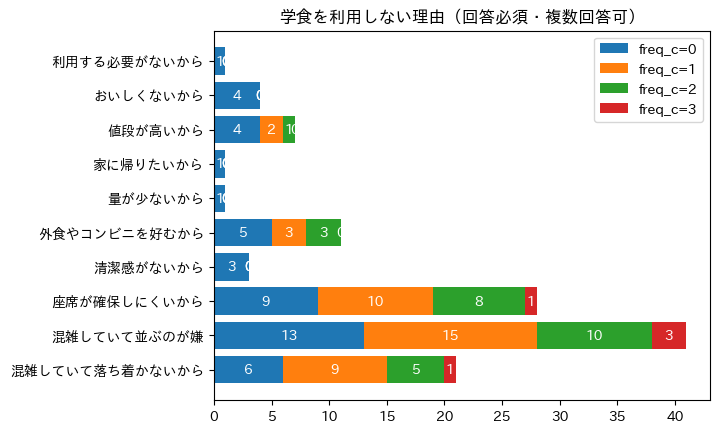

In [17]:
#df_reasons_for_not_using_c = extract_columns(df_dummy, 13)
#y_labels = list(df_reasons_for_not_using_c.columns)
#y_labels = [label[4:] for label in y_labels]
#heights = list(df_reasons_for_not_using_c.sum())
#fig, ax = plt.subplots()
#p = ax.barh(y_labels, heights)
#ax.set_title("学食を利用しない理由（複数回答）")
#ax.bar_label(p, label_type="center", color="white")

df_reasons_for_not_using_c = extract_columns(df_dummy, 13)
y_labels = list(df_reasons_for_not_using_c.columns)
new_y_labels = [label[4:].replace("~", "～") for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("学食を利用しない理由（回答必須・複数回答可）")
ax.legend()

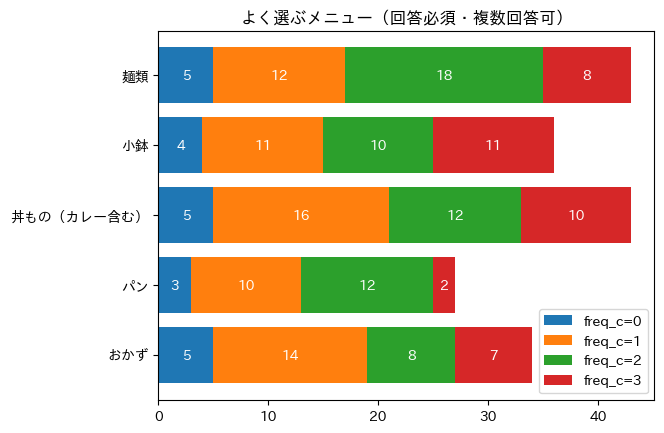

In [18]:
df_frequently_chose_menu = extract_columns(df_dummy, 14)
y_labels = list(df_frequently_chose_menu.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("よく選ぶメニュー（回答必須・複数回答可）")
ax.legend()

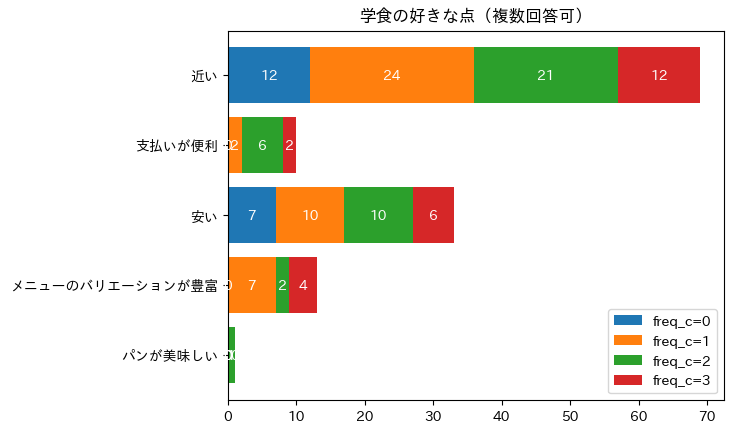

In [19]:
df_good_points_of_c = extract_columns(df_dummy, 15)
y_labels = list(df_good_points_of_c.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("学食の好きな点（複数回答可）")
ax.legend()

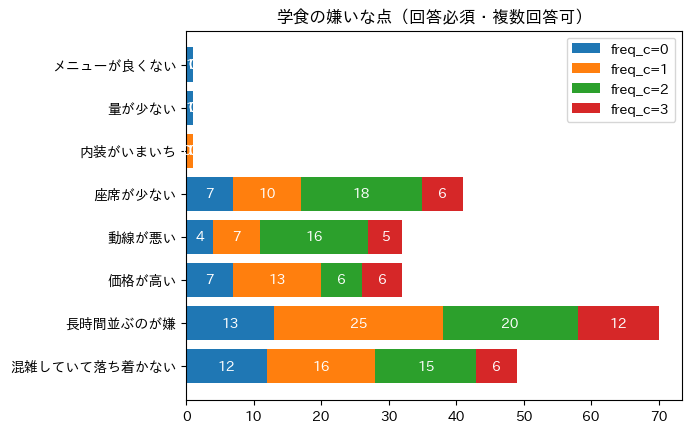

In [20]:
df_bad_points_of_c = extract_columns(df_dummy, 16)
y_labels = list(df_bad_points_of_c.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("学食の嫌いな点（回答必須・複数回答可）")
ax.legend()

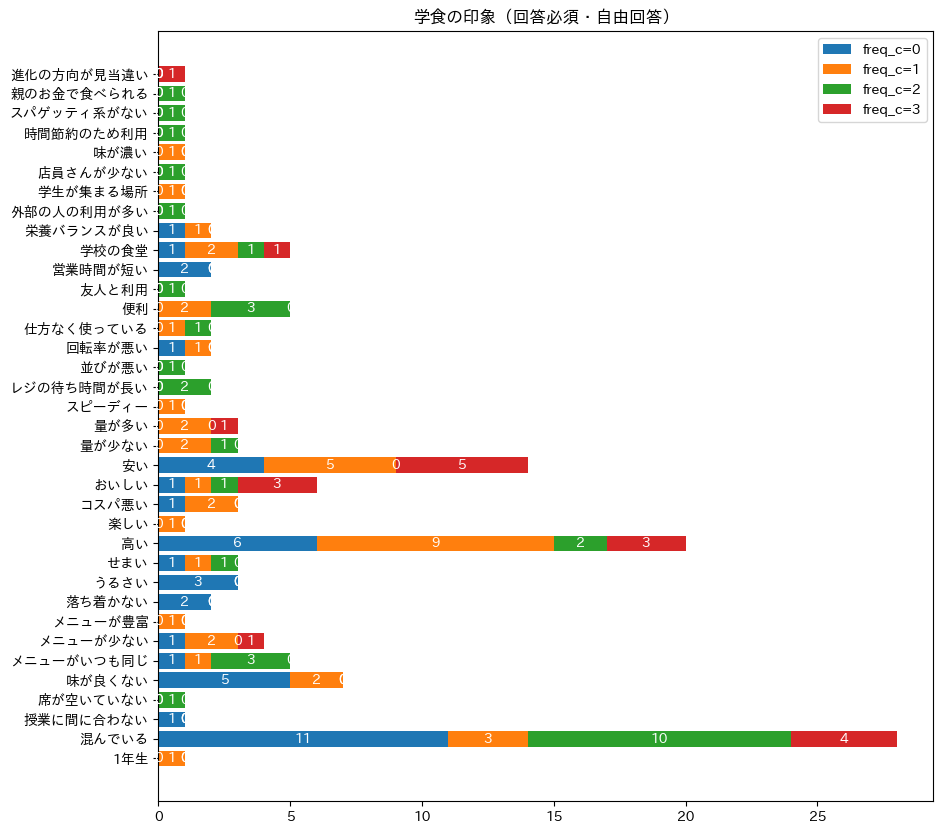

In [21]:
df_impression_of_c = extract_columns(df_dummy, 17)
df_impression_of_c.drop(["Q17_impression_of_c", "Q17_positive", "Q17_neutral", "Q17_negative"], axis="columns", inplace=True)
y_labels = list(df_impression_of_c.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("学食の印象（回答必須・自由回答）")
ax.legend()

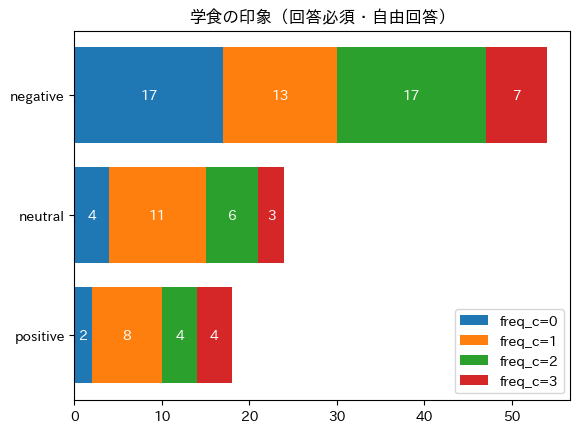

In [22]:
df_impression_of_c_classif = pd.concat([df_dummy["Q17_positive"], df_dummy["Q17_neutral"], df_dummy["Q17_negative"]], axis=1)
y_labels = list(df_impression_of_c_classif.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("学食の印象（回答必須・自由回答）")
ax.legend()

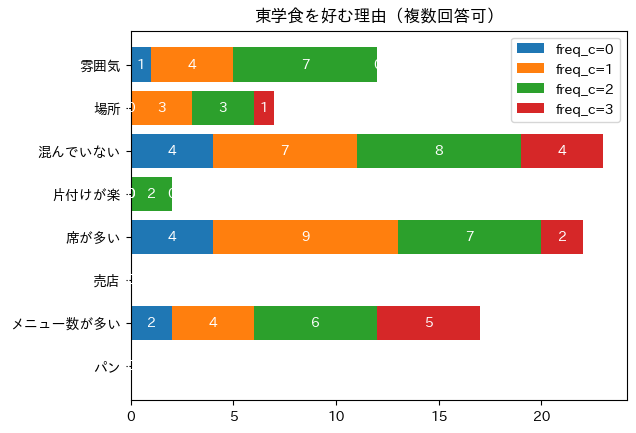

In [23]:
df_reasons_for_prefering_e = df_dummy[df_dummy["Q18_prefer_east"] == 1]
df_reasons_e_vs_w = extract_columns(df_dummy, 19)
y_labels = list(df_reasons_e_vs_w.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_reasons_for_prefering_e[(df_reasons_for_prefering_e[y_labels[i]] == 1) & (df_reasons_for_prefering_e["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("東学食を好む理由（複数回答可）")
ax.legend()

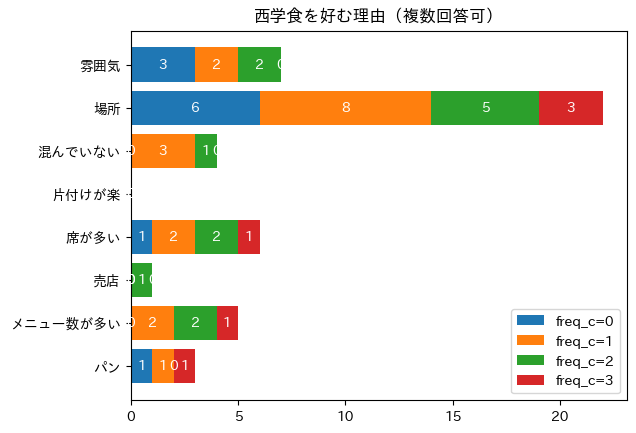

In [24]:
df_reasons_for_prefering_w = df_dummy[df_dummy["Q18_prefer_west"] == 1]
df_reasons_e_vs_w = extract_columns(df_dummy, 19)
y_labels = list(df_reasons_e_vs_w.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_reasons_for_prefering_w[(df_reasons_for_prefering_w[y_labels[i]] == 1) & (df_reasons_for_prefering_w["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("西学食を好む理由（複数回答可）")
ax.legend()

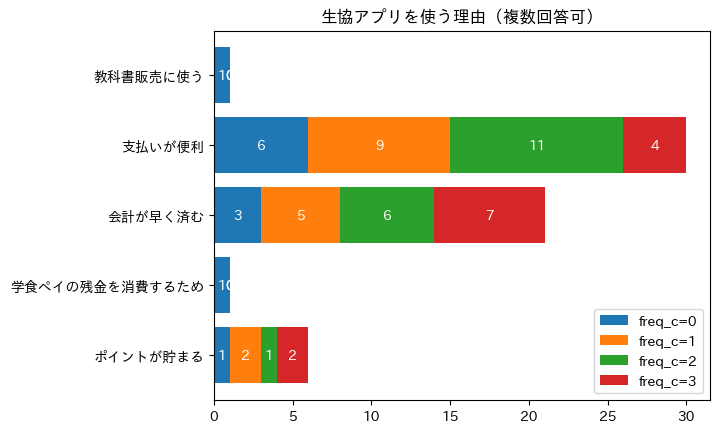

In [25]:
df_reasons_for_using_app = extract_columns(df_dummy, 24)
y_labels = list(df_reasons_for_using_app.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("生協アプリを使う理由（複数回答可）")
ax.legend()

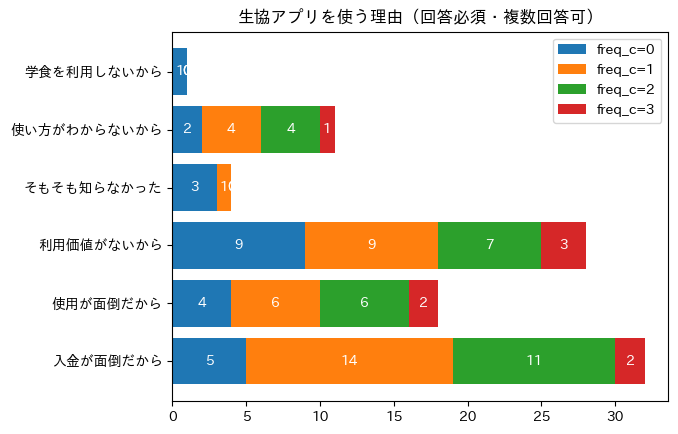

In [26]:
df_reasons_for_not_using_app = extract_columns(df_dummy, 26)
y_labels = list(df_reasons_for_not_using_app.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("生協アプリを使う理由（回答必須・複数回答可）")
ax.legend()

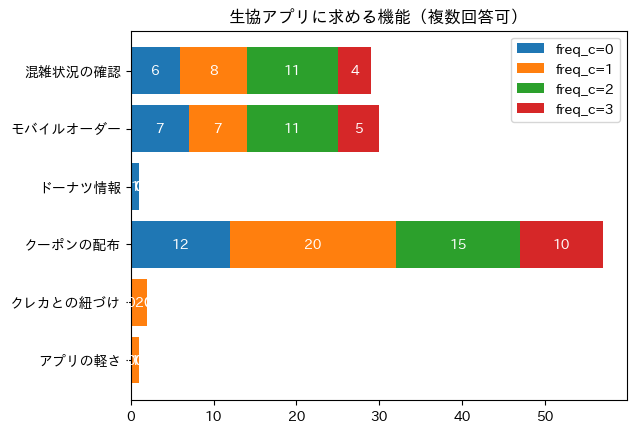

In [27]:
df_desirable_features = extract_columns(df_dummy, 27)
y_labels = list(df_desirable_features.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("生協アプリに求める機能（複数回答可）")
ax.legend()

<Axes: title={'center': '学年と生協利用頻度の相関'}>

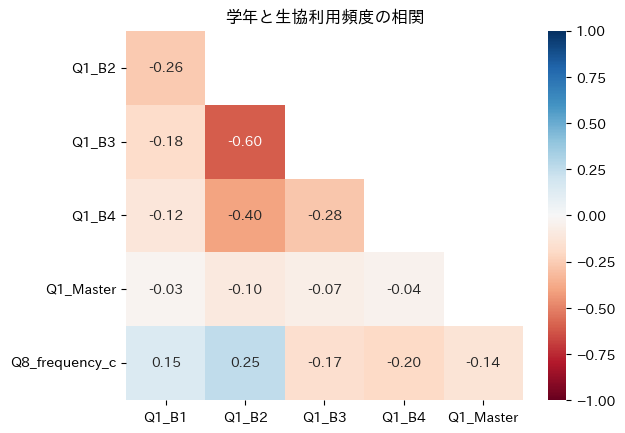

In [28]:
df_tmp = pd.concat([extract_columns(df_dummy, 1), extract_columns(df_dummy, 8)], axis=1)
df_corr = df_tmp.corr()
r, c = df_corr.shape
cnt = 0
for i in range(r):
    for j in range(cnt, c):
        df_corr.iloc[i, j] = float("nan")
    cnt += 1
df_corr = df_corr.iloc[1:, :c-1]
fig, ax = plt.subplots()
ax.set_title("学年と生協利用頻度の相関")
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="RdBu", annot=True, fmt=".2f")

C:\Users\thiyo\AppData\Local\Temp\ipykernel_27048\4245169482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5 = df4["grade"].replace({"B1": 1, "B2": 2, "B3": 3, "B4": 4, "Master": 5})


<Axes: title={'center': '学年と生協利用頻度の相関'}>

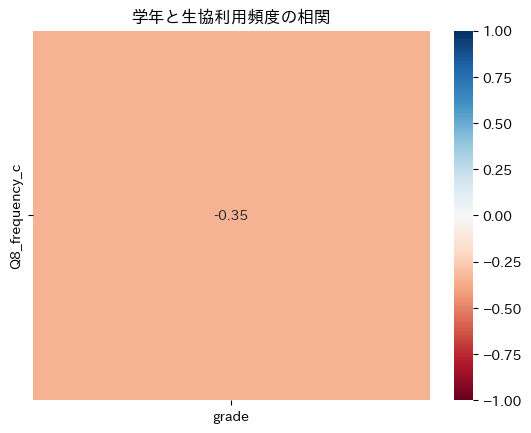

In [29]:
df5 = df4["grade"].replace({"B1": 1, "B2": 2, "B3": 3, "B4": 4, "Master": 5})
df_tmp = pd.concat([df5, extract_columns(df_dummy, 8)], axis=1)
df_corr = df_tmp.corr()
r, c = df_corr.shape
cnt = 0
for i in range(r):
    for j in range(cnt, c):
        df_corr.iloc[i, j] = float("nan")
    cnt += 1
df_corr = df_corr.iloc[1:, :c-1]
fig, ax = plt.subplots()
ax.set_title("学年と生協利用頻度の相関")
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="RdBu", annot=True, fmt=".2f")

<Axes: >

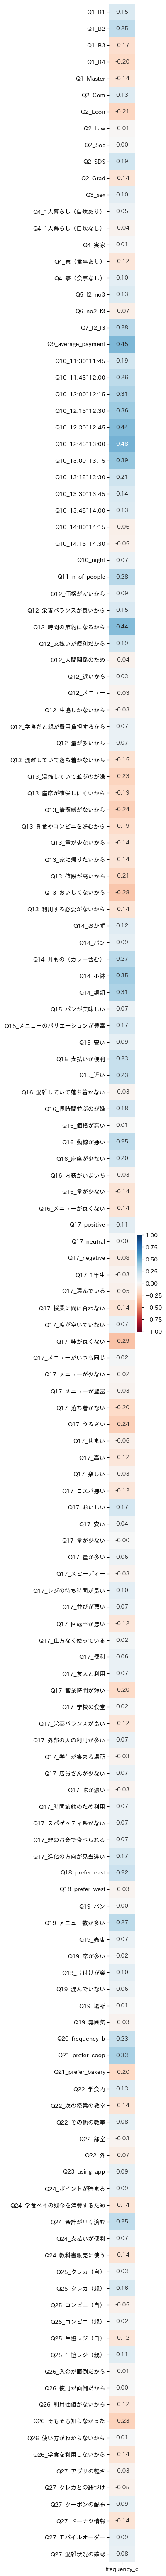

In [30]:
df_dummy_tmp = df_dummy.drop(columns=["Q8_frequency_c", "Q17_impression_of_c"])
fig, ax = plt.subplots(figsize=(1, 80))
df_corr = df_dummy_tmp.corrwith(df_dummy["Q8_frequency_c"])
df_corr1 = df_corr.to_frame("frequency_c")
sns.heatmap(df_corr1, vmax=1, vmin=-1, cmap="RdBu", annot=True, fmt=".2f")

### 仮説
栄養・使いやすさ・居心地の3つの軸で改革を行う

In [44]:
df_y = df_dummy["Q8_frequency_c"]
df_x = pd.concat([df4["grade"].replace({"B1": 1, "B2": 2, "B3": 3, "B4": 4, "Master": 5}).to_frame("Q1_grade"), 
                  df_dummy[["Q12_栄養バランスが良いから", 
                            "Q12_時間の節約になるから", 
                            "Q12_人間関係のため", 
                            "Q13_おいしくないから", 
                            "Q13_混雑していて並ぶのが嫌", 
                            "Q16_動線が悪い"]]], axis=1)

C:\Users\thiyo\AppData\Local\Temp\ipykernel_27048\2595416662.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_x = pd.concat([df4["grade"].replace({"B1": 1, "B2": 2, "B3": 3, "B4": 4, "Master": 5}).to_frame("Q1_grade"),


<Axes: >

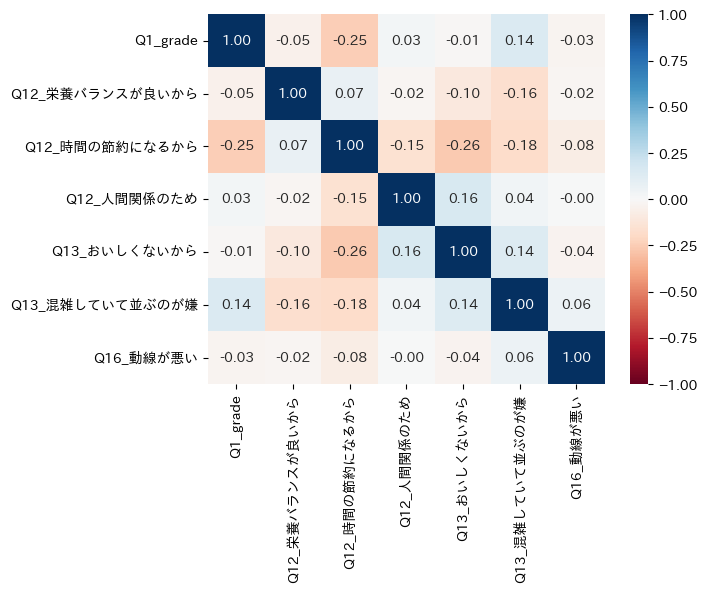

In [45]:
df_corr = df_x.corr()
ax.set_title("説明変数同士の相関チェック")
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="RdBu", annot=True, fmt=".2f")

In [46]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]
vif["features"] = df_x.columns
vif

,VIF_Factor,features
0,3.273408,Q1_grade
1,1.251744,Q12_栄養バランスが良いから
2,2.047490,Q12_時間の節約になるから
3,1.099988,Q12_人間関係のため
4,1.122895,Q13_おいしくないから
5,1.828517,Q13_混雑していて並ぶのが嫌
6,1.434124,Q16_動線が悪い


In [47]:
df_x = df_x.set_axis(["X1", "X2", "X3", "X4", "X5", "X6", "X7"], axis="columns")
model = sm.OLS(df_y, sm.add_constant(df_x))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Q8_frequency_c   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     7.702
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           3.06e-07
Time:                        12:05:18   Log-Likelihood:                -112.94
No. Observations:                  96   AIC:                             241.9
Df Residuals:                      88   BIC:                             262.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4984      0.341      4.397      0.0

In [48]:
3.06 * 10**(-7)

3.06e-07